## Steam Video Games Revenue from January - September 2024

### Library

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Loading & Data Cleaning

In [2]:
df_raw = pd.read_csv('Steam_2024_bestRevenue_1500.csv')
df_raw

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
...,...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,1465460
1496,Dark and Darker,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,2016590
1497,Songs of Conquest,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,867210
1498,GUNDAM BREAKER 4,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",1672500


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1500 non-null   object 
 1   releaseDate     1500 non-null   object 
 2   copiesSold      1500 non-null   int64  
 3   price           1500 non-null   float64
 4   revenue         1500 non-null   float64
 5   avgPlaytime     1500 non-null   float64
 6   reviewScore     1500 non-null   int64  
 7   publisherClass  1500 non-null   object 
 8   publishers      1499 non-null   object 
 9   developers      1498 non-null   object 
 10  steamId         1500 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 129.0+ KB


In [4]:
df_raw['releaseDate'] = pd.to_datetime(df_raw['releaseDate'], dayfirst=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            1500 non-null   object        
 1   releaseDate     1500 non-null   datetime64[ns]
 2   copiesSold      1500 non-null   int64         
 3   price           1500 non-null   float64       
 4   revenue         1500 non-null   float64       
 5   avgPlaytime     1500 non-null   float64       
 6   reviewScore     1500 non-null   int64         
 7   publisherClass  1500 non-null   object        
 8   publishers      1499 non-null   object        
 9   developers      1498 non-null   object        
 10  steamId         1500 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 129.0+ KB


In [5]:
df_raw.drop('steamId', inplace=True, axis=1)
df_raw

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS
...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,2024-04-11,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games
1496,Dark and Darker,2024-06-07,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE
1497,Songs of Conquest,2024-05-20,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion
1498,GUNDAM BREAKER 4,2024-08-28,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd"


In [6]:
df_raw.isna().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        1
developers        2
dtype: int64

In [7]:
df_raw.fillna(value='Unknown',inplace=True)
df_raw.isna().sum()

name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
dtype: int64

In [8]:
df_raw.to_csv('dataset_clean.csv',index=False)

### Exploratory Data Analysis (EDA)

In [9]:
df = pd.read_csv('dataset_clean.csv')
df

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,WWE 2K24,2024-03-07,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,EARTH DEFENSE FORCE 6,2024-07-25,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,Sins of a Solar Empire II,2024-08-15,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"
3,Legend of Mortal,2024-06-14,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.
4,Shin Megami Tensei V: Vengeance,2024-06-13,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS
...,...,...,...,...,...,...,...,...,...,...
1495,Infection Free Zone,2024-04-11,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games
1496,Dark and Darker,2024-06-07,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE
1497,Songs of Conquest,2024-05-20,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion
1498,GUNDAM BREAKER 4,2024-08-28,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd"


#### Top 10 games by revenue

In [10]:
top10_revenue = df.sort_values(by='revenue', ascending=False).head(10)
top10_revenue[['name', 'revenue', 'copiesSold', 'price', 'publisherClass', 'publishers']]

,name,revenue,copiesSold,price,publisherClass,publishers
1450,Black Myth: Wukong,837793356.0,15517278,59.99,AAA,Game Science
1451,HELLDIVERS™ 2,435635596.0,11905198,39.99,AAA,PlayStation Publishing LLC
1452,Palworld,392328553.0,16704850,29.99,AA,Pocketpair
1453,Sons Of The Forest,217017892.0,8693478,29.99,AA,Newnight
1454,Dragon's Dogma 2,111478291.0,1785028,69.99,AAA,"CAPCOM Co., Ltd."
1455,The First Descendant,102244808.0,4043850,0.00,AA,NEXON
1456,Last Epoch,97723674.0,3300623,34.99,AA,Eleventh Hour Games
1457,7 Days to Die,89781931.0,9877443,44.99,AA,The Fun Pimps Entertainment LLC
1458,V Rising,83614738.0,4784609,34.99,AA,Stunlock Studios
1459,Manor Lords,63098408.0,2294915,39.99,AA,Hooded Horse


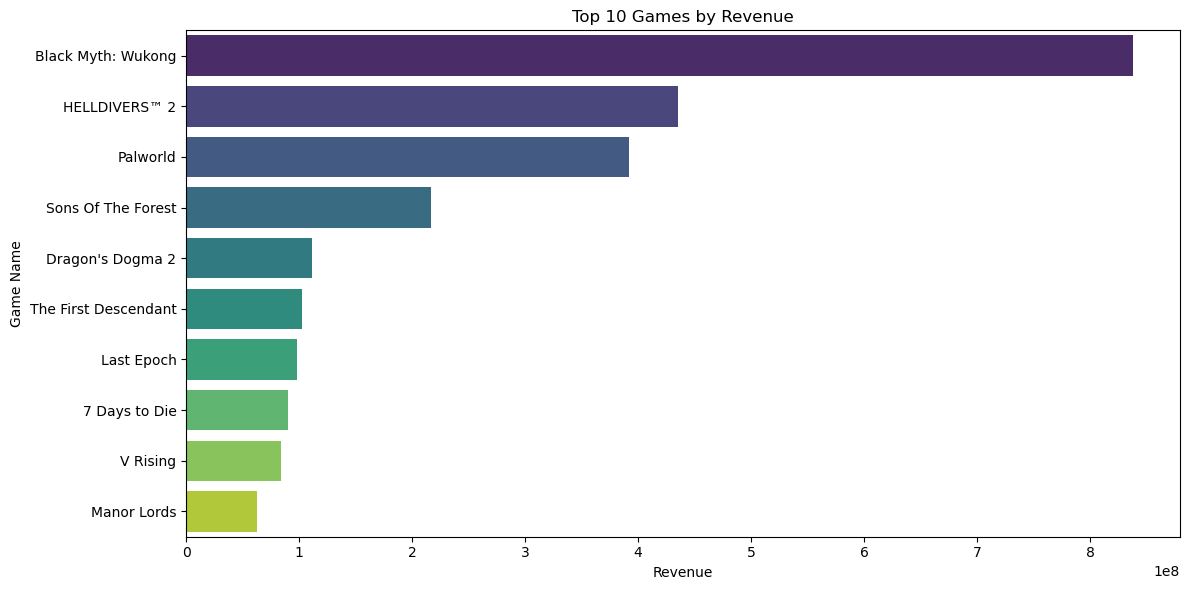

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(y=top10_revenue['name'],x=top10_revenue['revenue'],palette='viridis')
plt.xlabel('Revenue')
plt.ylabel('Game Name')
plt.title('Top 10 Games by Revenue')
plt.tight_layout()
plt.show()

The bar chart visualizes the top 10 games by revenue, highlighting the most commercially successful titles in the dataset. Key insights from the chart include:

- **Dominance of AAA and AA Titles:** Most of the top 10 games are published by AAA or AA publishers, indicating that larger studios with more resources tend to generate higher revenues.
- **Revenue Disparity:** "Black Myth: Wukong" stands out with a significantly higher revenue compared to other titles, suggesting exceptional market anticipation or sales performance.
- **Pricing Strategies:** The chart shows a mix of premium-priced games and free-to-play titles that have achieved high revenue through large sales volumes.

Overall, the chart underscores the importance of production value, publisher reputation, and player engagement in driving revenue for top-performing games.

#### Correlation berween price and revenue

In [12]:
corr = df['price'].corr(df['revenue'])
print(f"Correlation between price and revenue: {corr:.4f}")

if corr < 0.3:
    print("There is a weak correlation between price and revenue, suggesting that price does not strongly affect revenue.")
elif corr < 0.7:
    print("There is a moderate correlation between price and revenue, suggesting some relationship.")
else:
    print("There is a strong correlation between price and revenue, suggesting price significantly affects revenue.")

Correlation between price and revenue: 0.1625
There is a weak correlation between price and revenue, suggesting that price does not strongly affect revenue.


The calculated correlation coefficient between game price and revenue is **0.16**, indicating a weak positive relationship. This suggests that while there is a slight tendency for higher-priced games to generate more revenue, price alone does not strongly determine a game's revenue performance. Other factors, such as copies sold, publisher reputation, marketing, and game quality, likely play a more significant role in driving revenue. Therefore, pricing strategy should be considered alongside these additional factors when aiming to maximize revenue.

#### Revenue Distribution by Publisher Class (AAA vs Indie vs AA)

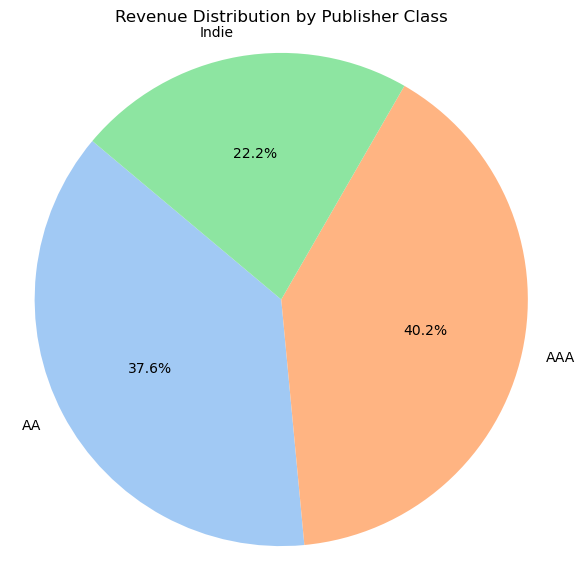

In [13]:
revenue_by_class = df[df['publisherClass'].isin(['AAA', 'AA', 'Indie'])].groupby('publisherClass')['revenue'].sum()
plt.figure(figsize=(7,7))
plt.pie(revenue_by_class, labels=revenue_by_class.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution by Publisher Class')
plt.axis('equal')
plt.show()

The pie chart illustrates the distribution of total revenue among different publisher classes: AAA, AA, and Indie. Key observations include:

- **AAA publishers** account for the largest share of total revenue, reflecting their significant market presence, larger budgets, and established franchises.
- **AA publishers** also contribute a substantial portion, indicating that mid-sized studios can achieve notable commercial success, often by targeting niche markets or delivering high-quality experiences at a lower scale.
- **Indie publishers** represent a smaller slice of the revenue pie. While indie games can achieve breakout success, the overall revenue generated by this class is comparatively lower, likely due to limited resources and reach.

This distribution highlights the competitive advantage of larger publishers in generating revenue, but also underscores the meaningful impact that AA and Indie studios can have within the industry.

#### Revenue per publisher/developer.

Top 10 Publishers by Revenue:
publishers
Game Science                       837793356.0
PlayStation Publishing LLC         508885199.0
Pocketpair                         392328553.0
Newnight                           217017892.0
CAPCOM Co., Ltd.                   117881025.0
NEXON                              102244808.0
Eleventh Hour Games                 97723674.0
The Fun Pimps Entertainment LLC     89781931.0
Stunlock Studios                    83614738.0
Hooded Horse                        78487195.0
Name: revenue, dtype: float64


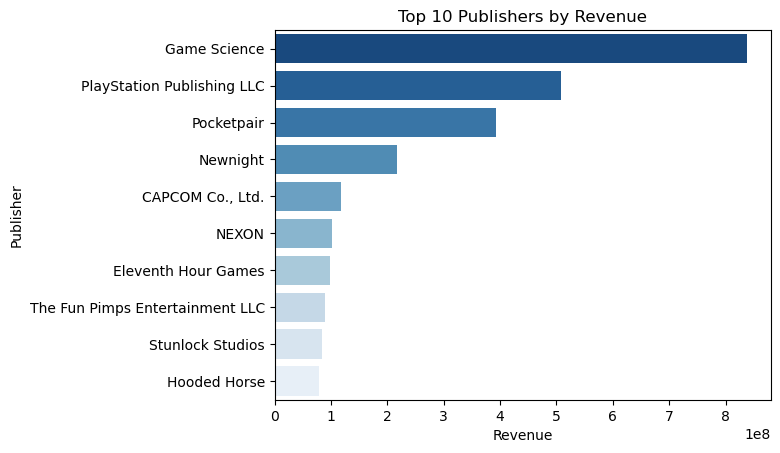

In [ ]:
# Revenue per publisher
revenue_per_publisher = df.groupby('publishers')['revenue'].sum().sort_values(ascending=False)
print("Top 10 Publishers by Revenue:")
print(revenue_per_publisher.head(10))

sns.barplot(y=revenue_per_publisher.head(10).index, x=revenue_per_publisher.head(10).values, palette='Blues_r')
plt.title('Top 10 Publishers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Publisher')
plt.show()

The bar chart displays the top 10 publishers ranked by total revenue generated from their games in the dataset. Key insights include:

- **Market Leaders:** Game Science, PlayStation Publishing LLC, and Pocketpair are the leading publishers.
- **Revenue Concentration:** There is a steep drop in revenue after the top few publishers, indicating that a small number of publishers dominate the market.
- **Diversity:** The list includes both large, established companies and newer or smaller publishers, reflecting a mix of industry giants and rising stars.
- **Strategic Publishing:** Publishers with blockbuster titles or strong franchises tend to secure higher revenues, emphasizing the importance of hit games in overall financial performance.

This analysis highlights the competitive landscape among publishers and underscores the impact of successful game releases on revenue leadership.


Top 10 Developers by Revenue:
developers
Game Science              837793356.0
Arrowhead Game Studios    435635596.0
Pocketpair                392328553.0
Endnight Games Ltd        217017892.0
CAPCOM Co., Ltd.          117881025.0
NEXON Games Co., Ltd.     102244808.0
Eleventh Hour Games        97723674.0
The Fun Pimps              89781931.0
Stunlock Studios           83614738.0
Slavic Magic               63098408.0
Name: revenue, dtype: float64


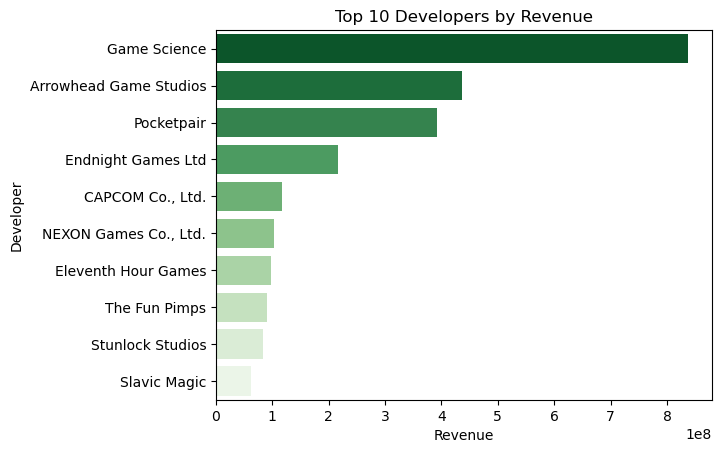

In [ ]:
# Revenue per developer
revenue_per_developer = df.groupby('developers')['revenue'].sum().sort_values(ascending=False)
print("\nTop 10 Developers by Revenue:")
print(revenue_per_developer.head(10))

sns.barplot(y=revenue_per_developer.head(10).index, x=revenue_per_developer.head(10).values, palette='Greens_r')
plt.title('Top 10 Developers by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Developer')
plt.show()

The bar chart presents the top 10 developers ranked by total revenue generated from their games in the dataset. Key observations include:

- **Market Leaders:** Game Science leads by a significant margin, followed by Arrowhead Game Studios and Pocketpair, indicating the outsized impact of blockbuster titles.
- **Revenue Concentration:** There is a steep decline in revenue after the top few developers, highlighting that a small number of studios dominate the market.
- **Diversity of Developers:** The list features both established studios and emerging developers, reflecting a mix of industry veterans and new entrants achieving commercial success.
- **Developer-Publisher Overlap:** Some top developers also act as publishers, potentially increasing their share of total revenue and control over distribution.
- **Impact of Hit Games:** The presence of developers with a single high-grossing title demonstrates the importance of breakout hits in driving overall revenue.

This analysis underscores the competitive landscape among developers and the critical role of successful game releases in achieving revenue leadership.